In [1]:
import numpy as np
import tsplib95
from python_tsp.distances.tsplib_distance import tsplib_distance_matrix

cities = np.atleast_2d(list(tsplib95.load("data/xqf131.tsp").node_coords.values()))
distance_matrix = tsplib_distance_matrix("data/xqf131.tsp")


In [2]:
distance_matrix


array([[  0,  13,  14, ...,  88,  84, 108],
       [ 13,   0,   1, ...,  85,  86, 107],
       [ 14,   1,   0, ...,  85,  87, 107],
       ...,
       [ 88,  85,  85, ...,   0,  32,  25],
       [ 84,  86,  87, ...,  32,   0,  31],
       [108, 107, 107, ...,  25,  31,   0]])

In [3]:
cities

array([[  0,  13],
       [  0,  26],
       [  0,  27],
       [  0,  39],
       [  2,   0],
       [  5,  13],
       [  5,  19],
       [  5,  25],
       [  5,  31],
       [  5,  37],
       [  5,  43],
       [  5,   8],
       [  8,   0],
       [  9,  10],
       [ 10,  10],
       [ 11,  10],
       [ 12,  10],
       [ 12,   5],
       [ 15,  13],
       [ 15,  19],
       [ 15,  25],
       [ 15,  31],
       [ 15,  37],
       [ 15,  43],
       [ 15,   8],
       [ 18,  11],
       [ 18,  13],
       [ 18,  15],
       [ 18,  17],
       [ 18,  19],
       [ 18,  21],
       [ 18,  23],
       [ 18,  25],
       [ 18,  27],
       [ 18,  29],
       [ 18,  31],
       [ 18,  33],
       [ 18,  35],
       [ 18,  37],
       [ 18,  39],
       [ 18,  41],
       [ 18,  42],
       [ 18,  44],
       [ 18,  45],
       [ 25,  11],
       [ 25,  15],
       [ 25,  22],
       [ 25,  23],
       [ 25,  24],
       [ 25,  26],
       [ 25,  28],
       [ 25,  29],
       [ 25,

In [4]:
from python_tsp.heuristics import solve_tsp_simulated_annealing

distance_matrix = tsplib_distance_matrix("data/xqf131.tsp")

permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
print(distance)
print(permutation)

612
[0, 5, 13, 16, 15, 14, 11, 4, 12, 17, 24, 25, 18, 26, 27, 28, 29, 19, 30, 31, 20, 21, 32, 33, 34, 35, 36, 37, 22, 38, 39, 40, 41, 58, 57, 56, 55, 51, 50, 49, 48, 47, 46, 54, 45, 52, 44, 53, 63, 67, 74, 76, 73, 88, 92, 97, 99, 100, 101, 105, 104, 113, 111, 122, 129, 120, 117, 123, 124, 125, 126, 130, 128, 127, 114, 118, 115, 119, 116, 121, 103, 102, 110, 109, 108, 107, 112, 106, 98, 91, 93, 95, 96, 94, 90, 89, 85, 84, 83, 82, 87, 86, 81, 80, 77, 68, 64, 61, 65, 69, 66, 62, 75, 70, 78, 79, 71, 72, 59, 60, 43, 42, 23, 10, 3, 9, 8, 2, 1, 7, 6]


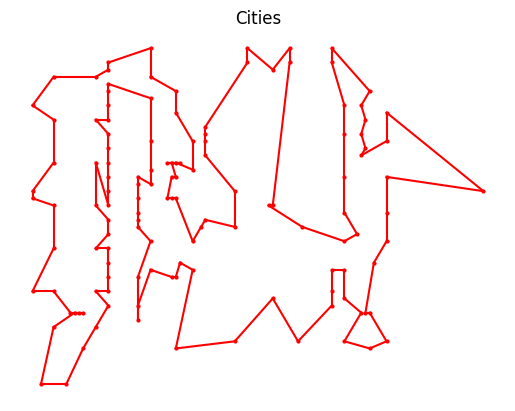

In [5]:
import matplotlib.pyplot as plt

plt.axis('off')
plt.title("Cities")

plt.plot(cities[:, 0], cities[:,1], 'or', markersize=2)

for i in range(len(permutation) - 1):
    plt.plot(cities[[permutation[i], permutation[i+1]], 0], cities[[permutation[i], permutation[i+1]], 1], c="r")

plt.plot(cities[[permutation[len(cities) - 1], 0], 0], cities[[permutation[len(cities) - 1], 0], 1], c="r")

plt.show()

In [109]:
from sklearn.cluster import KMeans

N_CLUSTERS = 10

kmeans = KMeans(n_clusters=N_CLUSTERS).fit(cities)
print(kmeans.labels_)

[8 9 9 9 8 8 9 9 9 9 2 8 8 8 8 8 8 8 8 5 5 5 2 2 8 8 8 5 5 5 5 5 5 5 5 5 2
 2 2 2 2 2 2 2 0 0 5 5 5 5 5 5 0 0 0 4 4 4 2 2 2 4 4 0 4 4 4 0 4 4 4 4 4 0
 0 4 0 0 4 4 4 4 4 4 4 4 7 7 7 6 6 7 7 7 6 6 6 7 7 3 3 3 6 6 3 3 3 3 1 1 1
 3 3 3 1 1 1 3 1 1 3 1 3 3 3 1 1 1 1 3 1]


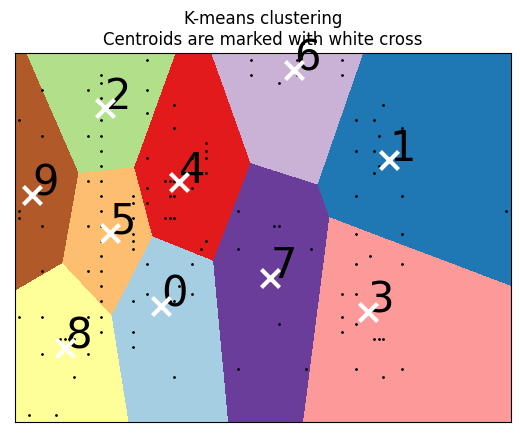

In [110]:
import matplotlib.pyplot as plt

# reduced_data = PCA(n_components=2).fit_transform(data)
# kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
# kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = cities[:, 0].min() - 1, cities[:, 0].max() + 1
y_min, y_max = cities[:, 1].min() - 1, cities[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(cities[:, 0], cities[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

for idx, c in enumerate(centroids):
    plt.annotate(idx, c, fontsize = 30)

plt.title(
    "K-means clustering\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [44]:
from python_tsp.distances.euclidean_distance import euclidean_distance_matrix

subproblems = []

for i in range(N_CLUSTERS):
    problem = np.atleast_2d([city for idx, city in enumerate(cities) if kmeans.labels_[idx] == i])
    subproblems.append(problem)

permutations = []
for p in subproblems:
    distance_matrix = euclidean_distance_matrix(p)
    permutation, distance = solve_tsp_simulated_annealing(distance_matrix)
    print(distance)
    permutations.append(permutation)
    print(permutation)

341.0926626361222
[0, 5, 13, 16, 15, 14, 11, 4, 12, 17, 24, 18, 19, 30, 20, 33, 32, 31, 29, 28, 27, 26, 25, 44, 52, 73, 76, 80, 81, 77, 74, 67, 63, 53, 45, 54, 46, 47, 48, 49, 61, 64, 68, 55, 56, 57, 66, 62, 65, 69, 70, 75, 78, 79, 82, 83, 84, 85, 71, 72, 58, 59, 60, 43, 42, 23, 41, 40, 39, 38, 22, 37, 36, 51, 50, 34, 35, 21, 9, 10, 3, 8, 2, 1, 7, 6]
275.4319616775663
[0, 1, 3, 4, 8, 9, 10, 17, 16, 24, 23, 22, 28, 32, 29, 33, 30, 35, 42, 41, 40, 44, 39, 38, 37, 27, 31, 34, 43, 36, 25, 18, 19, 26, 21, 20, 15, 14, 13, 11, 2, 6, 12, 7, 5]


In [ ]:
from math import dist

h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = cities[:, 0].min() - 1, cities[:, 0].max() + 1
y_min, y_max = cities[:, 1].min() - 1, cities[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(cities[:, 0], cities[:, 1], "k.", markersize=2)

for s, p in zip(subproblems, permutations):
    for i in range(len(p) - 1):
        plt.plot(s[[p[i], p[i+1]], 0], s[[p[i], p[i+1]], 1], c="r")
    plt.plot(s[[p[len(s) - 1], 0], 0], s[[p[len(s) - 1], 0], 1], c="r")

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

closest_points = []

for i, s in enumerate(subproblems):
    local_centroids = [x for idx, x in enumerate(centroids) if idx != i]
    # print(local_centroids)
    distances = []
    for c in s:
        d = []
        for l in local_centroids:
            d.append(dist(l, c))
        distances.append((c, np.mean(d)))

    distances.sort(key=lambda x: x[1])
    # print(distances)
    x1 = distances[0][0]
    closest_points.append(x1)

    # print(x1)
    # print(permutations[i])

    idx1 = [idx for idx, x in enumerate(s) if x[0] == x1[0] and x[1] == x1[1]][0]
    idx1p = permutations[i].index(idx1)
    # print(idx1p)
    forward = idx1p + 1
    if forward >= len(permutations[i]):
        forward = 0
    backward = idx1p - 1

    new_perm = list(permutations[i])

    if dist(s[permutations[i][forward]], local_centroids[0]) < dist(s[permutations[i][backward]], local_centroids[0]):
        x2 = s[permutations[i][forward]]
        idx2p = forward
        new_perm = new_perm[idx1p::-1] + new_perm[:idx2p - 1:-1]
    else:
        x2 = s[permutations[i][backward]]
        idx2p = backward
        new_perm = new_perm[idx1p:] + new_perm[:idx2p + 1]
    permutations[i] = new_perm
    print(permutations[i])
    closest_points.append(x2)

closest_points = np.atleast_2d(closest_points)
print(closest_points)

plt.scatter(
    closest_points[:, 0],
    closest_points[:, 1],
    marker="o",
    s=30,
    linewidths=3,
    color="b",
    zorder=10,
)


plt.title(
    "K-means clustering\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

[81, 77, 74, 67, 63, 53, 45, 54, 46, 47, 48, 49, 61, 64, 68, 55, 56, 57, 66, 62, 65, 69, 70, 75, 78, 79, 82, 83, 84, 85, 71, 72, 58, 59, 60, 43, 42, 23, 41, 40, 39, 38, 22, 37, 36, 51, 50, 34, 35, 21, 9, 10, 3, 8, 2, 1, 7, 6, 0, 5, 13, 16, 15, 14, 11, 4, 12, 17, 24, 18, 19, 30, 20, 33, 32, 31, 29, 28, 27, 26, 25, 44, 52, 73, 76, 80]
[1, 3, 4, 8, 9, 10, 17, 16, 24, 23, 22, 28, 32, 29, 33, 30, 35, 42, 41, 40, 44, 39, 38, 37, 27, 31, 34, 43, 36, 25, 18, 19, 26, 21, 20, 15, 14, 13, 11, 2, 6, 12, 7, 5, 0]
[[41 23]
 [40 22]
 [48 27]
 [48 22]]


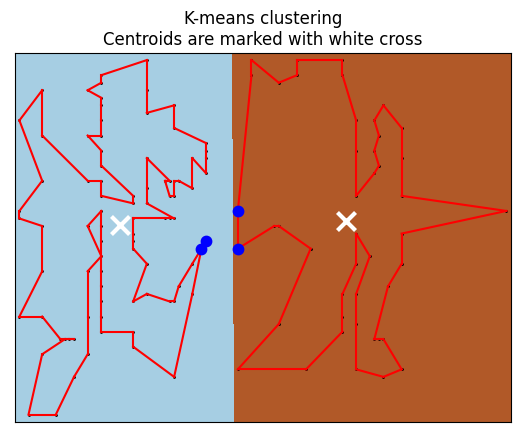

In [76]:
from math import dist

h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = cities[:, 0].min() - 1, cities[:, 0].max() + 1
y_min, y_max = cities[:, 1].min() - 1, cities[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(cities[:, 0], cities[:, 1], "k.", markersize=2)

for s, p in zip(subproblems, permutations):
    for i in range(len(p) - 1):
        plt.plot(s[[p[i], p[i+1]], 0], s[[p[i], p[i+1]], 1], c="r")
    plt.plot(s[[p[len(s) - 1], 0], 0], s[[p[len(s) - 1], 0], 1], c="r")

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

closest_points = []

for i, s in enumerate(subproblems):
    local_centroids = [x for idx, x in enumerate(centroids) if idx != i]
    # print(local_centroids)
    distances = []
    for c in s:
        d = []
        for l in local_centroids:
            d.append(dist(l, c))
        distances.append((c, np.mean(d)))

    distances.sort(key=lambda x: x[1])
    # print(distances)
    x1 = distances[0][0]
    closest_points.append(x1)

    # print(x1)
    # print(permutations[i])

    idx1 = [idx for idx, x in enumerate(s) if x[0] == x1[0] and x[1] == x1[1]][0]
    idx1p = permutations[i].index(idx1)
    # print(idx1p)
    forward = idx1p + 1
    if forward >= len(permutations[i]):
        forward = 0
    backward = idx1p - 1

    new_perm = list(permutations[i])

    if dist(s[permutations[i][forward]], local_centroids[0]) < dist(s[permutations[i][backward]], local_centroids[0]):
        x2 = s[permutations[i][forward]]
        idx2p = forward
        new_perm = new_perm[idx1p::-1] + new_perm[:idx2p - 1:-1]
    else:
        x2 = s[permutations[i][backward]]
        idx2p = backward
        new_perm = new_perm[idx1p:] + new_perm[:idx2p + 1]
    permutations[i] = new_perm
    print(permutations[i])
    closest_points.append(x2)

closest_points = np.atleast_2d(closest_points)
print(closest_points)

plt.scatter(
    closest_points[:, 0],
    closest_points[:, 1],
    marker="o",
    s=30,
    linewidths=3,
    color="b",
    zorder=10,
)


plt.title(
    "K-means clustering\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [48]:
def ccw(A,B,C):
    return (C[1]-A[1]) * (B[0]-A[0]) > (B[1]-A[1]) * (C[0]-A[0])

# Return true if line segments AB and CD intersect
def intersect(A,B,C,D):
    return ccw(A,C,D) != ccw(B,C,D) and ccw(A,B,C) != ccw(A,B,D)

In [78]:
p1 = closest_points[0]
p2 = closest_points[1]
p3 = closest_points[2]
p4 = closest_points[3]

In [85]:
seq1 = [subproblems[0][x] for x in permutations[0]]
seq2 = [subproblems[1][x] for x in permutations[1]]
print(seq1)
print(seq2)

seq_res = seq1

if intersect(p1, p3, p2, p4):
    seq_res += seq2
else:
    seq_res += list(reversed(seq2))

print()
seq_res = np.atleast_2d(seq_res)
print(seq_res)

[array([41, 23]), array([38, 20]), array([35, 17]), array([34, 15]), array([33, 15]), array([28, 16]), array([25, 15]), array([28, 20]), array([25, 22]), array([25, 23]), array([25, 24]), array([25, 26]), array([32, 26]), array([33, 26]), array([34, 26]), array([28, 28]), array([28, 30]), array([28, 34]), array([33, 31]), array([32, 31]), array([33, 29]), array([34, 29]), array([34, 31]), array([35, 31]), array([38, 30]), array([38, 34]), array([41, 32]), array([41, 34]), array([41, 35]), array([41, 36]), array([34, 38]), array([34, 41]), array([28, 40]), array([28, 43]), array([28, 47]), array([18, 45]), array([18, 44]), array([15, 43]), array([18, 42]), array([18, 41]), array([18, 39]), array([18, 37]), array([15, 37]), array([18, 35]), array([18, 33]), array([25, 29]), array([25, 28]), array([18, 29]), array([18, 31]), array([15, 31]), array([ 5, 37]), array([ 5, 43]), array([ 0, 39]), array([ 5, 31]), array([ 0, 27]), array([ 0, 26]), array([ 5, 25]), array([ 5, 19]), array([ 0, 13

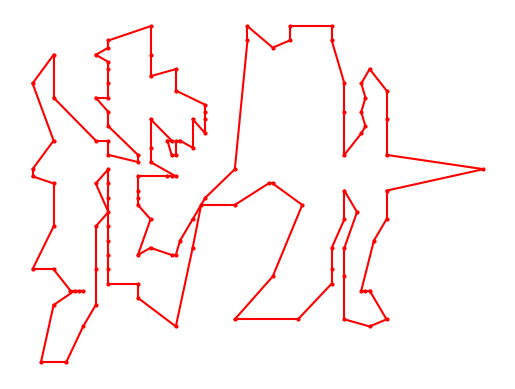

In [87]:
plt.axis('off')

plt.plot(seq_res[:, 0], seq_res[:,1], 'or', markersize=2)

for i in range(len(seq_res) - 1):
    plt.plot(seq_res[[i, i+1], 0], seq_res[[i, i+1], 1], c="r")

plt.plot(seq_res[[len(seq_res) - 1, 0], 0], seq_res[[len(seq_res) - 1, 0], 1], c="r")

plt.show()

In [89]:
cost = 0
for i in range(len(seq_res) - 1):
    cost += dist(seq_res[i], seq_res[i + 1])
cost += dist(seq_res[-1], seq_res[0])
print(cost)

626.172668499614
